# <BC카드 Data 시각화>

## 변수 설명

* 2014~2016년도 제주도 내 내국인 관광객의 업종, 성별, 연령대별 카드이용금액, 카드이용건수, 건당이용금액

|**변수명**|**값 설명**|
|:-----|:-----|
|**연도**|2014, 2015, 2016|
|**월**|1,2,3,4,5,6,7,8,9,10,11,12|
|**분기**|일 년을 4등분 한 3개월씩의 기간|
|**시도명**|서귀포시,제주시|
|**읍면동명**|남원읍,노형동,대륜동,삼도2동,성산읍,애월읍,연동,예래동,용담2동,이도2동|
|**업종명**|골프용품,귀금속,기념품점,기타음료식품,농축수산품,슈퍼마켓,스낵,스포츠레저용품,신발,악세서리,안경,약국,여성정장,의원|
|**성별**|남,여|
|**연령대**|20대,30대,40대,50대|
|**카드이용금액**|카드로 상품을 구매하거나 서비스를 이용한 금액|
|**카드이용건수**|카드로 상품을 구매하거나 서비스를 이용한 수|
|**건당이용금액**|카드이용금액/카드이용건수, 소수점 반올림|
|**관광객**|내국인|

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 

fm=mp.font_manager.FontManager()
plt.rcParams['font.family']='Malgun Gothic'

plt.style.use("seaborn-pastel")

In [2]:
df=pd.read_csv('C:\study\jeju.csv', encoding='cp949')
df

,연도,월,분기,시도명,읍면동명,업종명,성별,연령대,카드이용금액,카드이용건수,건당이용금액
0,2014,9,3,서귀포시,대륜동,농축수산품,여,50대,14434000,67,215433
1,2014,9,3,서귀포시,대륜동,농축수산품,남,50대,15119000,72,209986
2,2014,9,3,서귀포시,대륜동,농축수산품,여,40대,7609500,41,185598
3,2014,9,3,서귀포시,남원읍,농축수산품,남,50대,7092500,40,177313
4,2014,9,3,서귀포시,대륜동,농축수산품,남,40대,9098500,59,154212
...,...,...,...,...,...,...,...,...,...,...,...
13141,2016,8,3,서귀포시,남원읍,약국,남,30대,252900,43,5881
13142,2016,8,3,서귀포시,대륜동,약국,남,20대,276100,49,5635
13143,2016,8,3,서귀포시,대륜동,기타음료식품,남,30대,610850,118,5177
13144,2016,8,3,서귀포시,대륜동,기타음료식품,여,20대,416900,85,4905


In [3]:
# 연도별 카드이용건수 합계
df_year_count=df.groupby('연도')['카드이용건수'].sum()
df_year_count

연도
2014    225092
2015    859722
2016    667654
Name: 카드이용건수, dtype: int64

In [4]:
# 연도별 카드이용금액 합계
df_year_money=df.groupby('연도')['카드이용금액'].sum()
df_year_money

연도
2014     6618480931
2015    23783496181
2016    18201204162
Name: 카드이용금액, dtype: int64

## 분기/월 별 카드이용건수

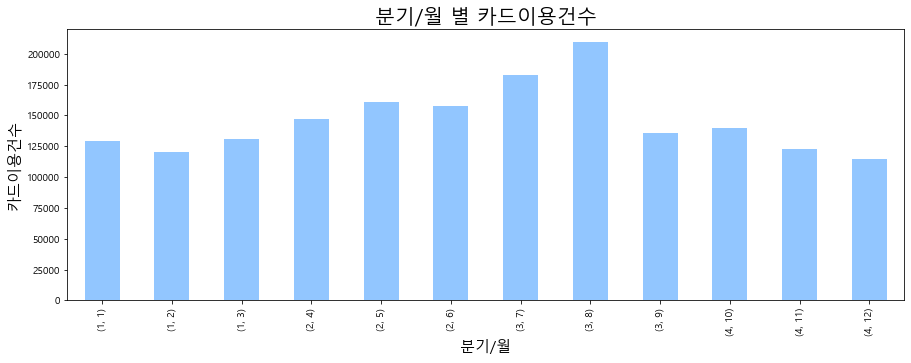

In [32]:
df_quar_month_count=df.groupby(['분기', '월'])['카드이용건수'].sum()
plt.figure(figsize=(15, 5))
plt.title('분기/월 별 카드이용건수', fontsize=20)
df_quar_month_count.plot(kind='bar')
plt.ylabel('카드이용건수', fontsize=15)
plt.xlabel('분기/월', fontsize=15)
plt.show()

**1분기: 1-3월, 2분기: 4-6월, 3분기: 7-9월, 4분기: 10-12월**
* 3분기에 카드이용건수가 상대적으로 높게 나타남. 
* 관광객이 집중되는 시기

## 연도/월 별 카드이용건수

Text(0.5, 0, '연도/월')

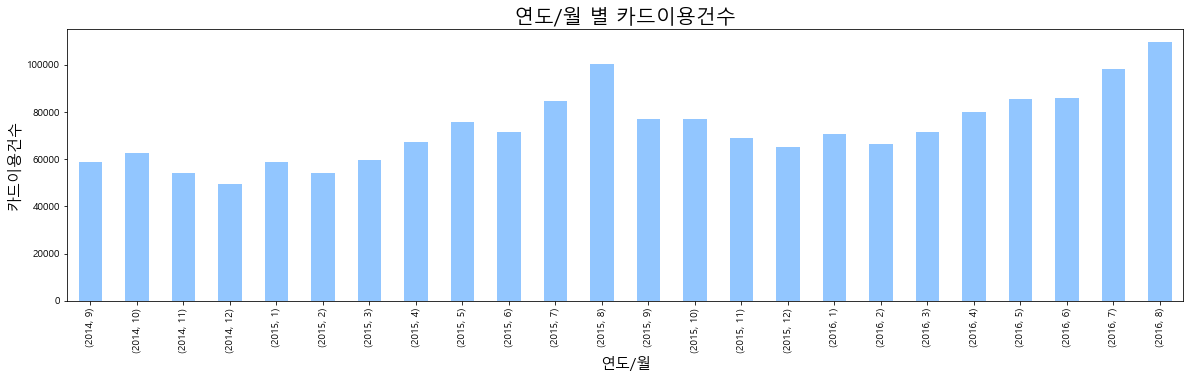

In [6]:
df_year_month_count=df.groupby(['연도', '월'])['카드이용건수'].sum()
plt.figure(figsize=(20, 5))
plt.title('연도/월 별 카드이용건수', fontsize=20)
df_year_month_count.plot(kind='bar')
plt.ylabel('카드이용건수', fontsize=15)
plt.xlabel('연도/월', fontsize=15)

**2015년,2016년 연도별 공통적인 특징**
* 여름휴가가 집중되는 7,8월 성수기(여름휴가철)에 타 월 대비 카드이용건수가 높게 나타남. 


## 업종 별 카드이용건수

Text(0.5, 0, '연도/업종')

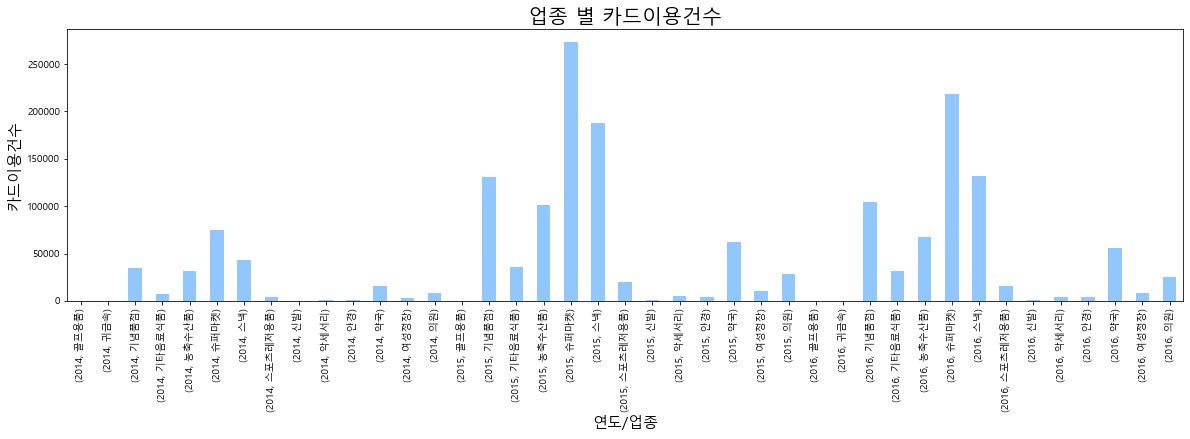

In [7]:
df_kind_count=df.groupby(['연도','업종명'])['카드이용건수'].sum()
plt.figure(figsize=(20, 5))
plt.title('업종 별 카드이용건수', fontsize=20)
df_kind_count.plot(kind='bar')
plt.ylabel('카드이용건수', fontsize=15)
plt.xlabel('연도/업종', fontsize=15)

### (연도별) 업종 별 카드이용건수

In [8]:
df2=df[['연도','업종명','카드이용건수']] 

In [9]:
df3=df2[(df2['연도']==2014)]
df4=df2[(df2['연도']==2015)]
df5=df2[(df2['연도']==2016)]

In [10]:
df3_kind_count=df3.groupby(['업종명'])['카드이용건수'].sum()
df4_kind_count=df4.groupby(['업종명'])['카드이용건수'].sum()
df5_kind_count=df5.groupby(['업종명'])['카드이용건수'].sum()

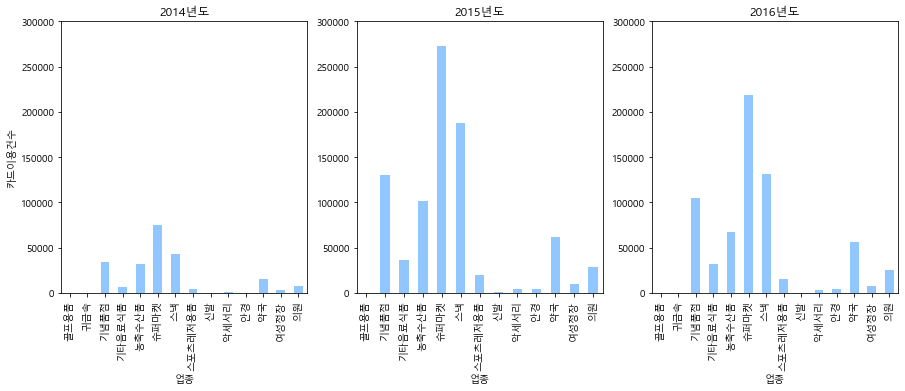

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df3_kind_count.plot(kind='bar', title='2014년도')
plt.ylim(0,300000)
plt.ylabel('카드이용건수', fontsize=10)
plt.xlabel('업종', fontsize=10)
 
plt.subplot(1, 3, 2)
df4_kind_count.plot(kind='bar', title='2015년도')
plt.ylim(0,300000)
plt.xlabel('업종', fontsize=10)
 
plt.subplot(1, 3, 3)
df5_kind_count.plot(kind='bar', title='2016년도')
plt.ylim(0,300000)
plt.xlabel('업종', fontsize=10)
 
plt.show()

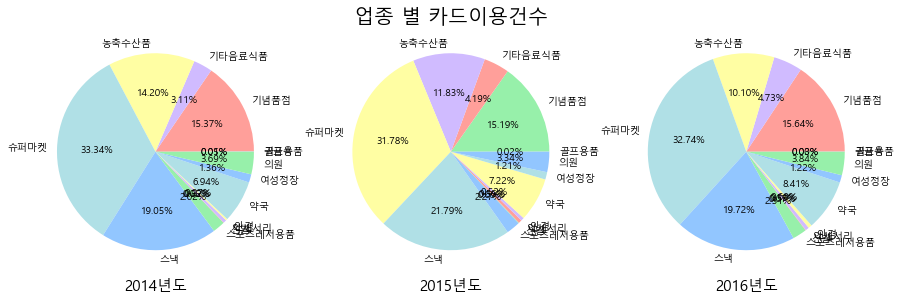

In [21]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
df3_kind_count.plot(kind='pie',  autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('2014년도', fontsize=15)
plt.ylabel('', fontsize=15)
 
plt.subplot(1, 3, 2)
df4_kind_count.plot(kind='pie', autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('2015년도', fontsize=15)
plt.title('업종 별 카드이용건수', fontsize=20)
plt.ylabel('', fontsize=15)
 
plt.subplot(1, 3, 3)
df5_kind_count.plot(kind='pie', autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('2016년도', fontsize=15)
plt.ylabel('', fontsize=15)
 
plt.show()

**카드이용건수가 높게 나타나는 업종**

2014년도
* 1위 업종 ) 슈퍼마켓 (33.34%)
* 2위 업종 ) 스낵 (19.05%)
* 3위 업종 ) 기념품점 (15.37%)


2015년도
* 1위 업종 ) 슈퍼마켓 (31.78%)
* 2위 업종 ) 스낵 (21.79%)
* 3위 업종 ) 기념품점 (15.19%)

2016년도
* 1위 업종 ) 슈퍼마켓 (32.74%)
* 2위 업종 ) 스낵 (19.72%)
* 3위 업종 ) 기념품점 (15.64%)


## 업종 별 카드이용금액

Text(0.5, 0, '업종')

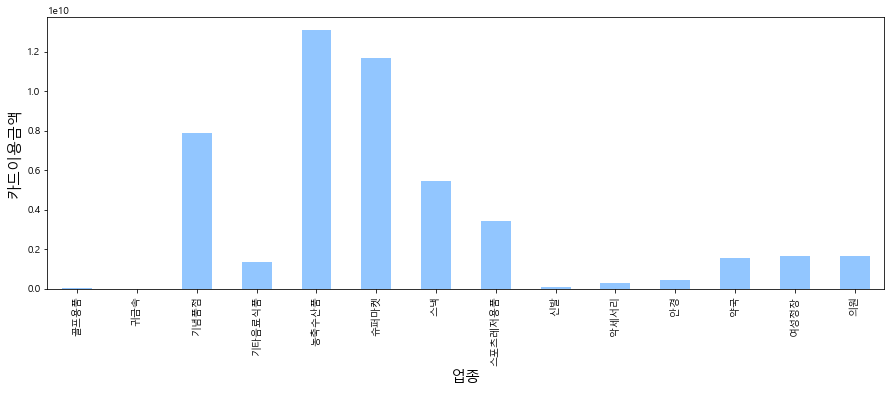

In [13]:
df_kind_money=df.groupby(['업종명'])['카드이용금액'].sum()
plt.figure(figsize=(15, 5))
df_kind_money.plot(kind='bar')
plt.ylabel('카드이용금액', fontsize=15)
plt.xlabel('업종', fontsize=15)

**카드이용금액이 높게 나타나는 업종**
* 농축수산품, 슈퍼마켓, 기념품점, 스낵, 스포츠레저용품 순으로 높게 나타남.
* 농축수산물- 제주도 특산물이 제주감귤, 한라봉, 흑돼지, 옥돔 
* 기념품점- 관광목적으로 제주도를 방문

## 연도/업종 별 카드이용금액

Text(0.5, 0, '연도/업종')

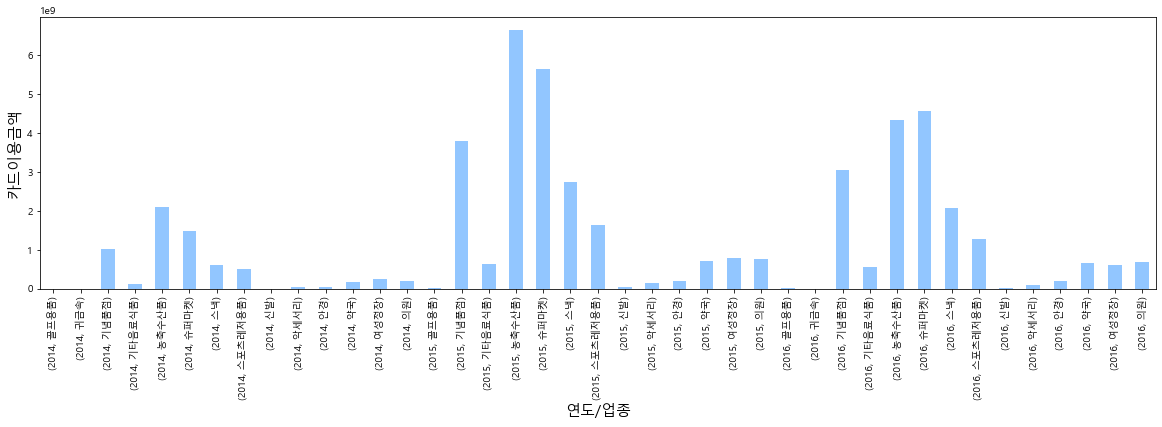

In [14]:
df_year_kind_money=df.groupby(['연도', '업종명'])['카드이용금액'].sum()
plt.figure(figsize=(20, 5))
df_year_kind_money.plot(kind='bar')
plt.ylabel('카드이용금액', fontsize=15)
plt.xlabel('연도/업종', fontsize=15)

In [15]:
df6=df[['연도','업종명','카드이용금액']] 
df7=df6[(df6['연도']==2014)]
df8=df6[(df6['연도']==2015)]
df9=df6[(df6['연도']==2016)]

In [16]:
df7_kind_money=df7.groupby(['업종명'])['카드이용금액'].sum()
df8_kind_money=df8.groupby(['업종명'])['카드이용금액'].sum()
df9_kind_money=df9.groupby(['업종명'])['카드이용금액'].sum()

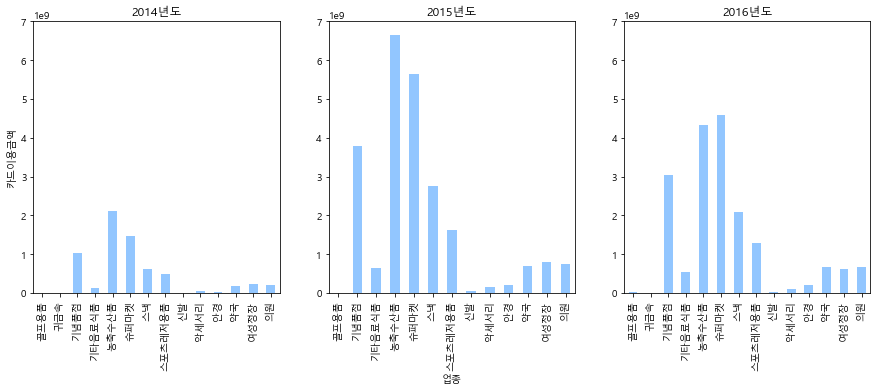

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df7_kind_money.plot(kind='bar', title='2014년도')
plt.ylim(0,7000000000)
plt.ylabel('카드이용금액', fontsize=10)
plt.xlabel('', fontsize=10)
 
plt.subplot(1, 3, 2)
df8_kind_money.plot(kind='bar', title='2015년도')
plt.ylim(0,7000000000)
plt.xlabel('업종', fontsize=10)
 
plt.subplot(1, 3, 3)
df9_kind_money.plot(kind='bar', title='2016년도')
plt.ylim(0,7000000000)
plt.xlabel('', fontsize=10)
 
plt.show()

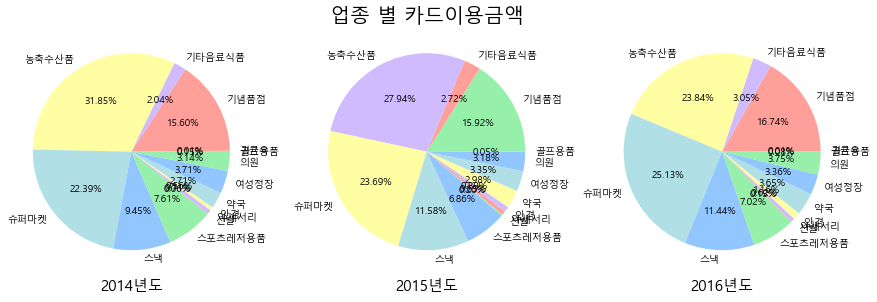

In [18]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
df7_kind_money.plot(kind='pie',  autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('2014년도', fontsize=15)
plt.ylabel('', fontsize=15)
 
plt.subplot(1, 3, 2)
df8_kind_money.plot(kind='pie', autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('2015년도', fontsize=15)
plt.title('업종 별 카드이용금액', fontsize=20)
plt.ylabel('', fontsize=15)
 
plt.subplot(1, 3, 3)
df9_kind_money.plot(kind='pie', autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('2016년도', fontsize=15)
plt.ylabel('', fontsize=15)
 
plt.show()

**제주 내국인 관광객, 업종별 카드이용금액 비교**  


2014년도
* 1위 업종 ) 농축수산품 (31.85%)
* 2위 업종 ) 슈퍼마켓 (22.39%)
* 3위 업종 ) 기념품점 (15.60%)


2015년도
* 1위 업종 ) 농축수산품 (27.94%)
* 2위 업종 ) 슈퍼마켓 (23.69%)
* 3위 업종 ) 기념품점 (15.92%)

2016년도
* 1위 업종 ) 슈퍼마켓 (25.13%)
* 2위 업종 ) 농축수산품 (23.84%)
* 3위 업종 ) 기념품점 (16.74%)


In [67]:
df

,연도,월,분기,시도명,읍면동명,업종명,성별,연령대,카드이용금액,카드이용건수,건당이용금액
0,2014,9,3,서귀포시,대륜동,농축수산품,여,50대,14434000,67,215433
1,2014,9,3,서귀포시,대륜동,농축수산품,남,50대,15119000,72,209986
2,2014,9,3,서귀포시,대륜동,농축수산품,여,40대,7609500,41,185598
3,2014,9,3,서귀포시,남원읍,농축수산품,남,50대,7092500,40,177313
4,2014,9,3,서귀포시,대륜동,농축수산품,남,40대,9098500,59,154212
...,...,...,...,...,...,...,...,...,...,...,...
13141,2016,8,3,서귀포시,남원읍,약국,남,30대,252900,43,5881
13142,2016,8,3,서귀포시,대륜동,약국,남,20대,276100,49,5635
13143,2016,8,3,서귀포시,대륜동,기타음료식품,남,30대,610850,118,5177
13144,2016,8,3,서귀포시,대륜동,기타음료식품,여,20대,416900,85,4905


## 건당이용금액 높은 업종

In [77]:
df_kind_meanmoney=df.groupby(['업종명'])['건당이용금액'].sum()
df_kind_meanmoney

업종명
골프용품         2797218
귀금속           178964
기념품점        32682471
기타음료식품      30292450
농축수산품      122304054
슈퍼마켓        34906286
스낵          28356283
스포츠레저용품     69557081
신발           5409479
악세서리        14396339
안경          23553545
약국          17543432
여성정장        55185606
의원          25100255
Name: 건당이용금액, dtype: int64

In [78]:
df_kind_meanmoney_c=df.groupby(['업종명'])['건당이용금액'].count()
df_kind_meanmoney_c

업종명
골프용품         39
귀금속           3
기념품점       1017
기타음료식품     1484
농축수산품      1884
슈퍼마켓       1911
스낵         1734
스포츠레저용품     840
신발           95
악세서리        403
안경          384
약국         1606
여성정장        673
의원         1073
Name: 건당이용금액, dtype: int64

In [79]:
df_kind_meanmoney/df_kind_meanmoney_c

업종명
골프용품       71723.538462
귀금속        59654.666667
기념품점       32136.156342
기타음료식품     20412.702156
농축수산품      64917.226115
슈퍼마켓       18265.979069
스낵         16353.104383
스포츠레저용품    82806.048810
신발         56941.884211
악세서리       35722.925558
안경         61337.356771
약국         10923.681196
여성정장       81999.414562
의원         23392.595527
Name: 건당이용금액, dtype: float64

In [82]:
df_kind_meanmoney_m=df.groupby(['업종명'])['건당이용금액'].mean()
df_kind_meanmoney_m

업종명
골프용품       71723.538462
귀금속        59654.666667
기념품점       32136.156342
기타음료식품     20412.702156
농축수산품      64917.226115
슈퍼마켓       18265.979069
스낵         16353.104383
스포츠레저용품    82806.048810
신발         56941.884211
악세서리       35722.925558
안경         61337.356771
약국         10923.681196
여성정장       81999.414562
의원         23392.595527
Name: 건당이용금액, dtype: float64

In [120]:
df_kind_meanmoney_m=df_kind_meanmoney_m.sort_values(ascending=False)
df_kind_meanmoney_m

업종명
스포츠레저용품    82806.048810
여성정장       81999.414562
골프용품       71723.538462
농축수산품      64917.226115
안경         61337.356771
귀금속        59654.666667
신발         56941.884211
악세서리       35722.925558
기념품점       32136.156342
의원         23392.595527
기타음료식품     20412.702156
슈퍼마켓       18265.979069
스낵         16353.104383
약국         10923.681196
Name: 건당이용금액, dtype: float64

Text(0.5, 0, '건당이용금액')

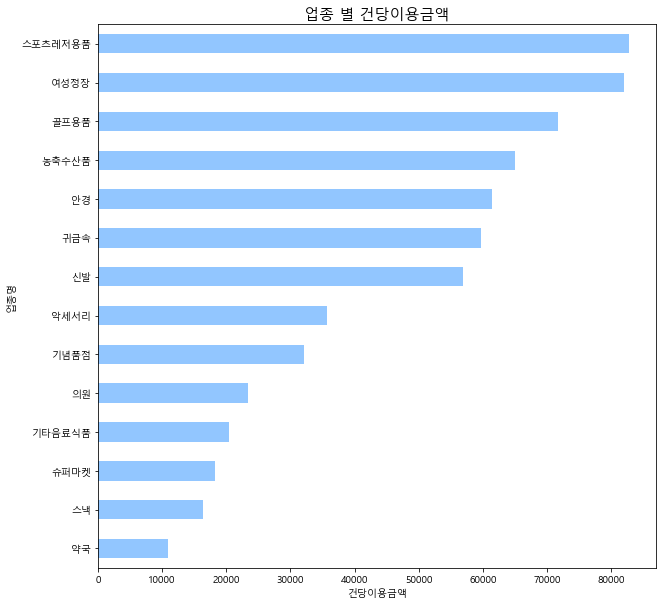

In [125]:
plt.figure(figsize=(10, 10))
df_kind_meanmoney_m.sort_values(ascending=True).plot(kind='barh', label='asc')
plt.title('업종 별 건당이용금액', fontsize=15)
plt.xlabel('건당이용금액', fontsize=10)

**업종 별 건당이용금액 비교**  

* 1위 ) 스포츠레저용품 83000원
* 2위 ) 여성정장 82000원
* 3위 ) 골프용품 72000원
* 4위 ) 농축수산품 65000원 